# 4. ObjectDetectionPipeline与机器视觉目标侦测任务

- 目标检测模型能够帮助用户识别图像中特定类别的物体。这类模型以图像作为输入，输出带有边界框和类别标签的检测结果图像。

## 4.1. 机器视觉目标侦测任务概述

### (1) Transformers框架实现的目标侦测算法类型

- 下面是Transformers框架提供的目标侦测算法实现：
    - Conditional DETR
    - D-FINE
    - DAB-DETR
    - Deformable DETR
    - DETR
    - LW-DETR
    - RT-DETR
    - RT-DETRv2
    - Table Transformer
    - YOLOS

- 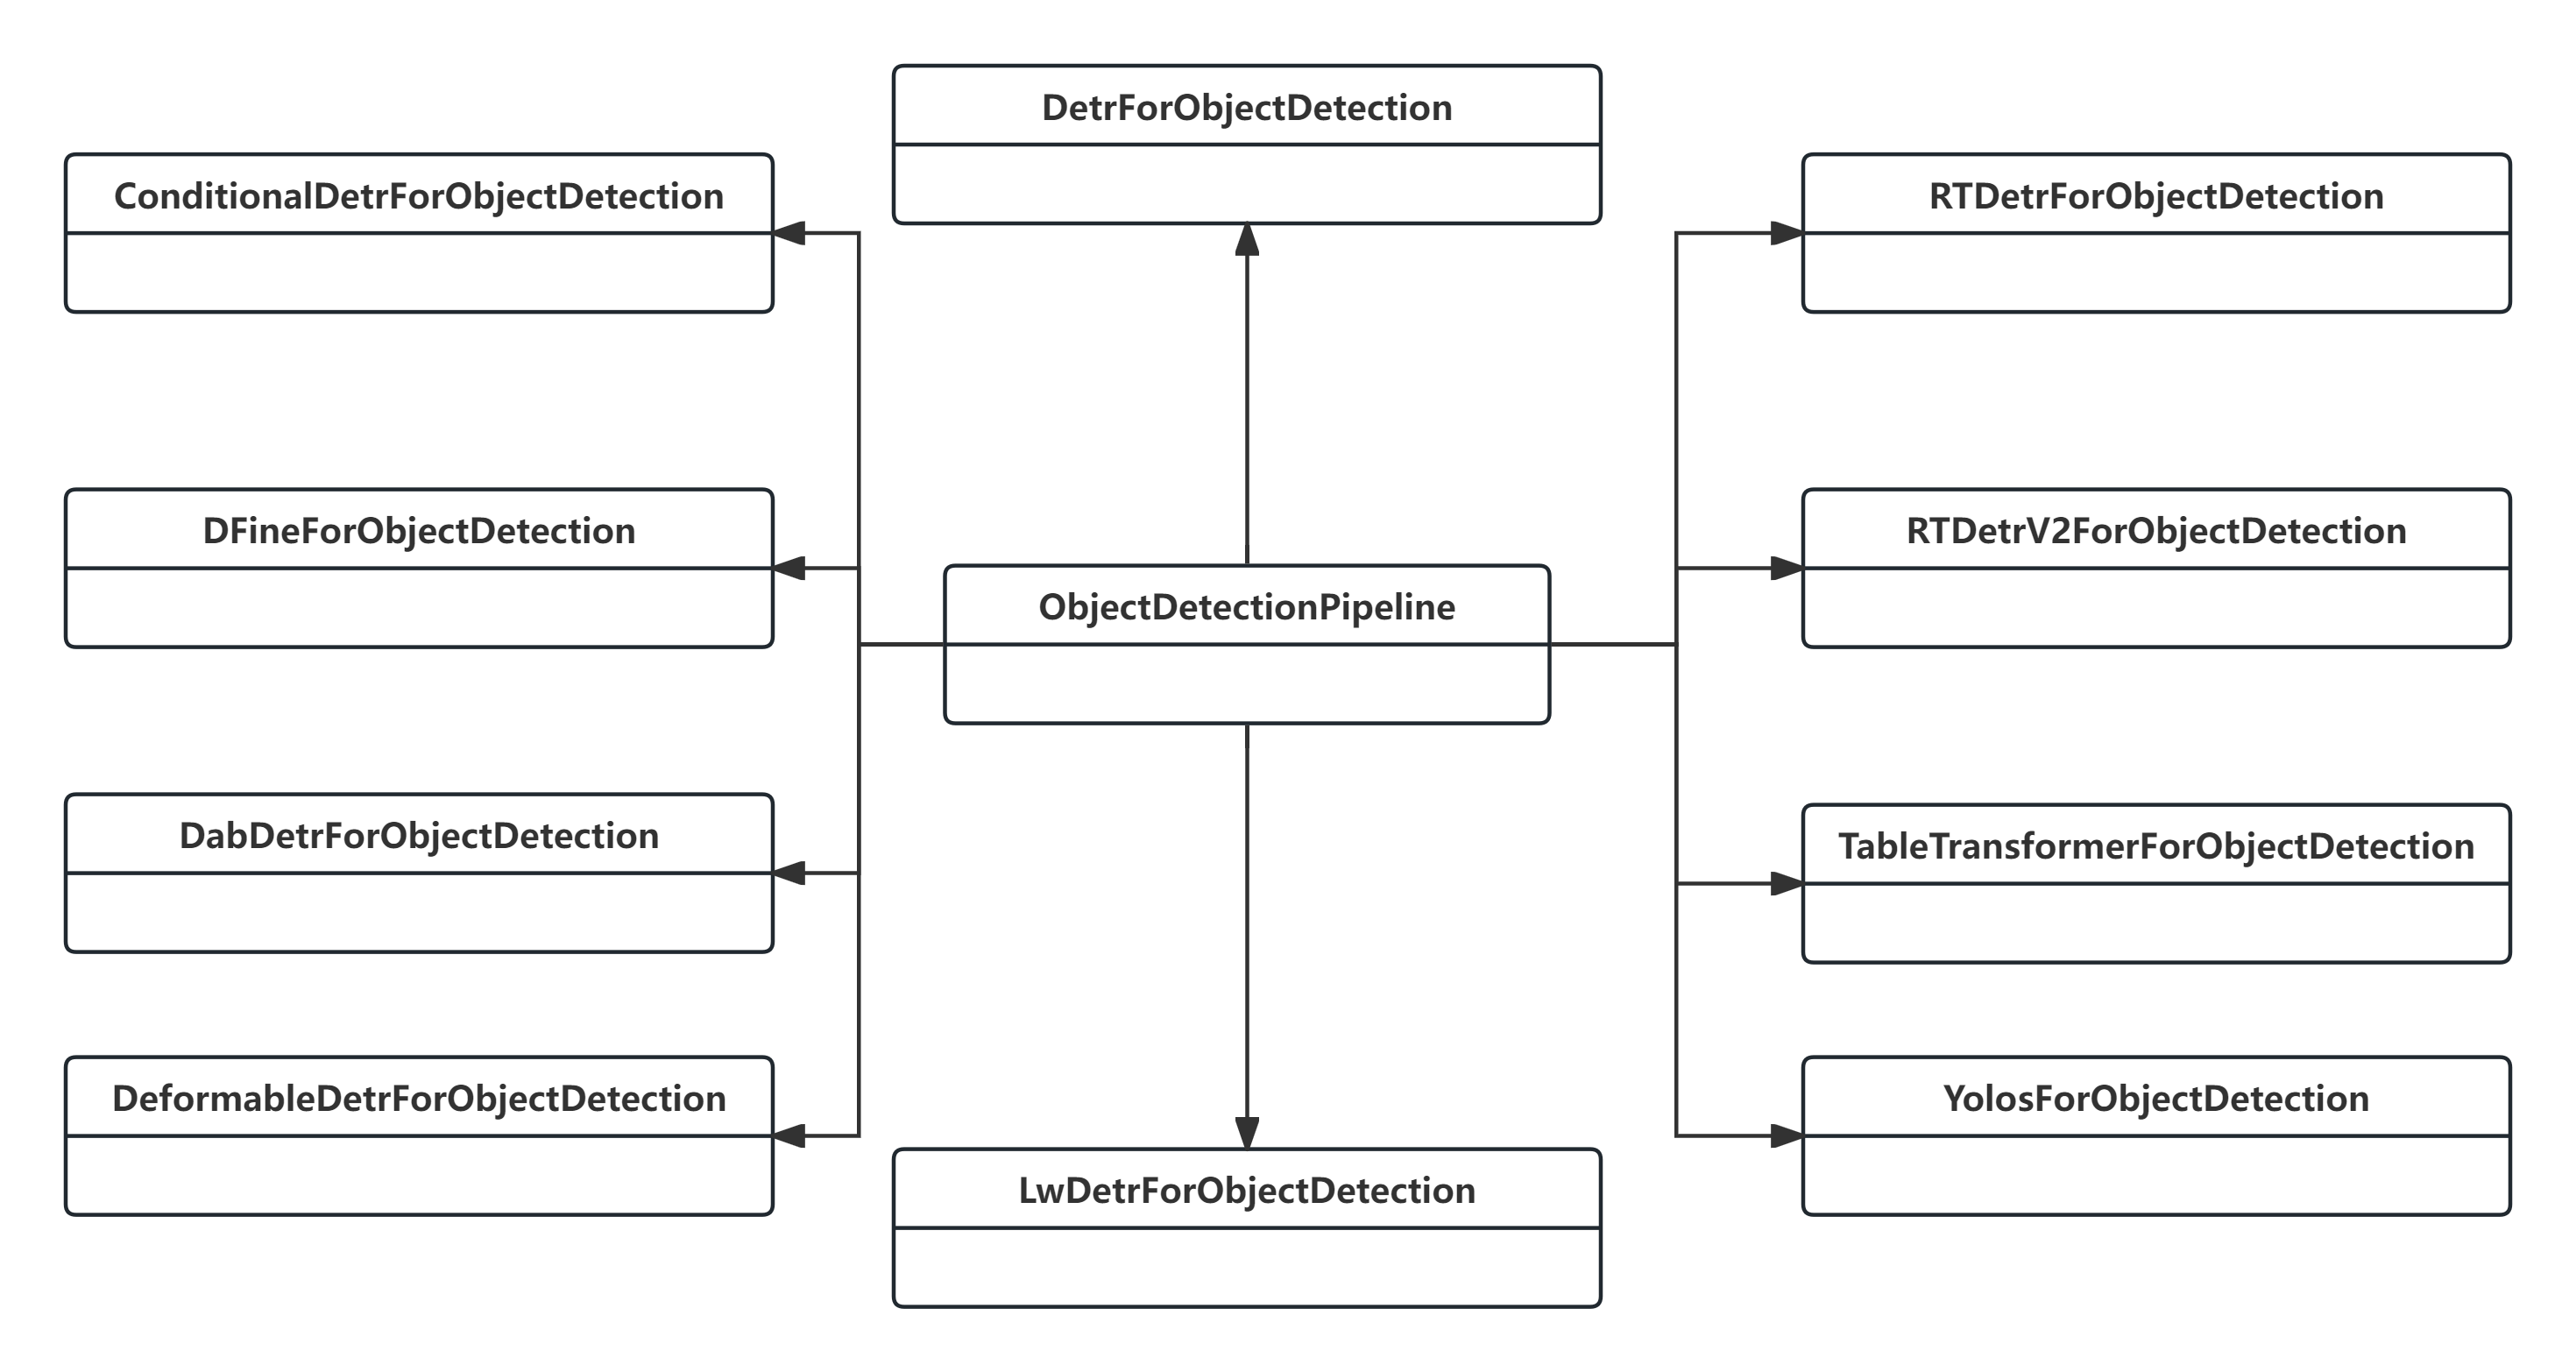

### () Transformers框架的目标侦测算法实现的核心类结构

- 每个算法的核心类主要包含：
    - YolosForObjectDetection：主要面向用户的调用接口类，通过下面几个类协调完成目标侦测任务：
        - YolosConfig：网络模型的配置。
        - YolosImageProcessor：图像预处理与后处理。
        - YolosImageProcessorFast：图像预处理与后处理（快捷方式，比如图像支持http等网络格式，而不仅仅是numpy.ndarray，PIL.Image等格式）。
        - YolosModel：核心网络模型实现类。

- 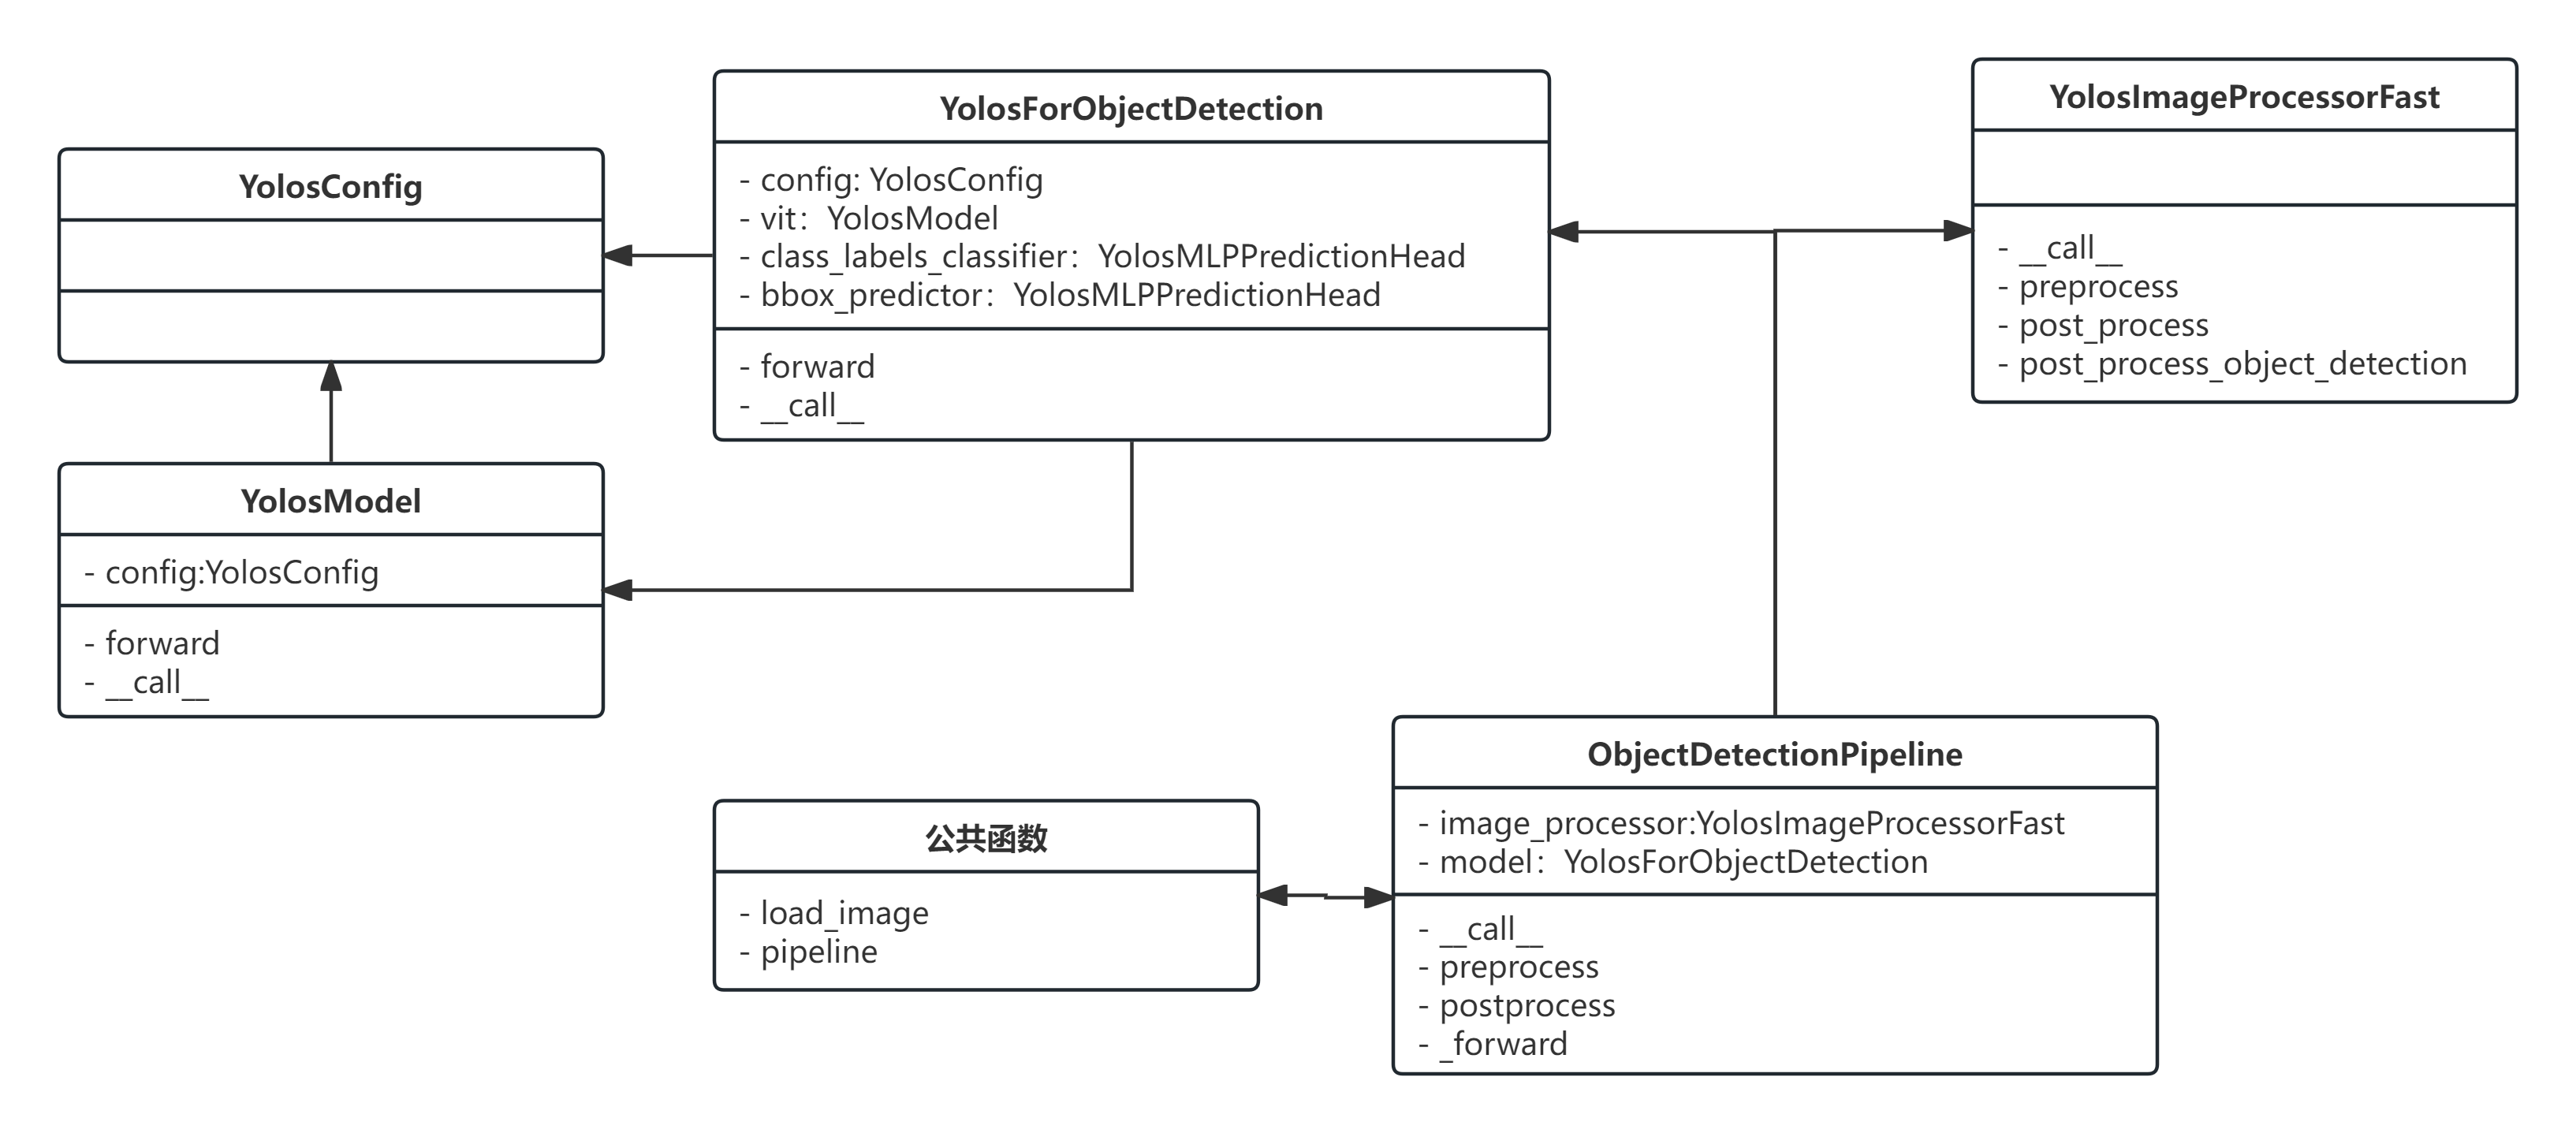

- ObjectDetectionPipeline的工作流程：
    - 通过pipeline函数调用，pipeline完成下面工作：
        - 调用YolosImageProcessorFast完成图像预处理，作为下一步的输入。该步骤的输入为各种格式的图像。
        - 调用YolosForObjectDetection完成推理，输出为下一步输入，该步骤的输入来自上一步的输出。
            - 处理目标相关侦测的辅助工作。
            - 调用YOLOModel完成推理。
        - 调用YolosImageProcessorFast完成图像后处理，输出为侦测的目标，该步骤的输入来自上一步的输出。

## 4.2. YOLO模型的目标侦测任务应用 

- 我们选择YOLO是因为在目标侦测领域是比较优秀，但是Transformers的YOLO实现不是最新的，最新的可以通过下面访问：
    - `https://github.com/ultralytics/ultralytics`（YOLO26实现）
    - `https://www.ultralytics.com/yolo`（模型下载）
    - `https://arxiv.org/abs/2509.25164` (最新的YOLO26的论文)

### (1) 模型下载

- `git clone https://www.modelscope.cn/hustvl/yolos-tiny.git`

### (2) 使用pipeline调用模型推理

Device set to use cuda:0


侦测到的目标数： 6
每个目标的结构(字典)： dict_keys(['score', 'label', 'box'])
[{'score': 0.9910101890563965, 'label': 'remote', 'box': {'xmin': 46, 'ymin': 72, 'xmax': 178, 'ymax': 119}}, {'score': 0.9084786772727966, 'label': 'remote', 'box': {'xmin': 336, 'ymin': 79, 'xmax': 368, 'ymax': 192}}, {'score': 0.9336217045783997, 'label': 'cat', 'box': {'xmin': 337, 'ymin': 18, 'xmax': 638, 'ymax': 373}}, {'score': 0.9794105291366577, 'label': 'cat', 'box': {'xmin': 10, 'ymin': 53, 'xmax': 313, 'ymax': 470}}, {'score': 0.5018212199211121, 'label': 'bed', 'box': {'xmin': 0, 'ymin': 1, 'xmax': 640, 'ymax': 474}}, {'score': 0.9740213751792908, 'label': 'remote', 'box': {'xmin': 41, 'ymin': 72, 'xmax': 178, 'ymax': 119}}]
0.9910101890563965, remote, (46, 72, 178, 119)
0.9084786772727966, remote, (336, 79, 368, 192)
0.9336217045783997, cat, (337, 18, 638, 373)
0.9794105291366577, cat, (10, 53, 313, 470)
0.5018212199211121, bed, (0, 1, 640, 474)
0.9740213751792908, remote, (41, 72, 178, 119)


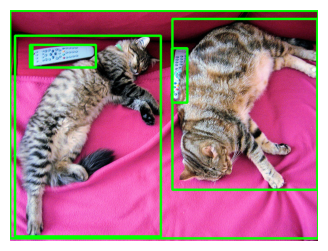

In [5]:
from transformers import pipeline
pipe = pipeline("object-detection", model="F:/03Models/yolos-tiny")

outputs = pipe("./imgs/000000039769.jpg")
print("侦测到的目标数：", len(outputs))
print("每个目标的结构(字典)：", outputs[0].keys())
print(outputs)

# 可视化结果
def visual(imgfile, objects):
    import matplotlib.pyplot as plt
    import cv2
    img = cv2.imread(imgfile, cv2.IMREAD_COLOR_RGB)
    for a_object in objects:
        score = a_object["score"]
        label = a_object["label"]
        xmin = a_object["box"]["xmin"]
        ymin = a_object["box"]["ymin"]
        xmax = a_object["box"]["xmax"]
        ymax = a_object["box"]["ymax"]
        print(F"{score}, {label}, ({xmin}, {ymin}, {xmax}, {ymax})")
        cv2.rectangle(img, pt1=(xmin, ymin), pt2=(xmax, ymax), color=(0, 255, 0), thickness=3)
    plt.figure(figsize=(4, 3))
    plt.imshow(img)
    plt.axis("off")
visual("./imgs/000000039769.jpg", outputs)

- 代码说明：
    - 其中`0.9910101890563965, remote, (46, 72, 178, 119)`与`0.9740213751792908, remote, (41, 72, 178, 119)`重叠度很高。

### (3) 使用ObjectDetectionPipeline调用模型推理

Device set to use cuda:0
Device set to use cuda:0


pipe1侦测到的目标数： 6
pipe2侦测到的目标数： 6
0.9910101890563965, remote, (46, 72, 178, 119)
0.9084786772727966, remote, (336, 79, 368, 192)
0.9336217045783997, cat, (337, 18, 638, 373)
0.9794105291366577, cat, (10, 53, 313, 470)
0.5018212199211121, bed, (0, 1, 640, 474)
0.9740213751792908, remote, (41, 72, 178, 119)


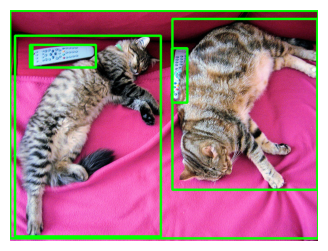

In [6]:
from transformers import pipeline
from transformers import ObjectDetectionPipeline, YolosConfig, YolosForObjectDetection
from transformers import YolosImageProcessor, YolosImageProcessorFast

img_file= "./imgs/000000039769.jpg"

# 使用pipeline创建ObjectDetectionPipeline对象
pipe1 = pipeline("object-detection", model="F:/03Models/yolos-tiny")
outputs1 = pipe1(img_file)
print("pipe1侦测到的目标数：", len(outputs1))

# 使用构造器创建ObjectDetectionPipeline对象
model = YolosForObjectDetection.from_pretrained("F:/03Models/yolos-tiny")
processor = YolosImageProcessor.from_pretrained("F:/03Models/yolos-tiny")
# processor = YolosImageProcessorFast.from_pretrained("F:/03Models/yolos-tiny")
pipe2 = ObjectDetectionPipeline(
    model=model, 
    image_processor=processor,
    task="object-detection"
)
outputs2 = pipe2(img_file)
print("pipe2侦测到的目标数：", len(outputs2))

# 可视化结果
def visual(imgfile, objects):
    import matplotlib.pyplot as plt
    import cv2
    img = cv2.imread(imgfile, cv2.IMREAD_COLOR_RGB)
    for a_object in objects:
        score = a_object["score"]
        label = a_object["label"]
        xmin = a_object["box"]["xmin"]
        ymin = a_object["box"]["ymin"]
        xmax = a_object["box"]["xmax"]
        ymax = a_object["box"]["ymax"]
        print(F"{score}, {label}, ({xmin}, {ymin}, {xmax}, {ymax})")
        cv2.rectangle(img, pt1=(xmin, ymin), pt2=(xmax, ymax), color=(0, 255, 0), thickness=3)
    plt.figure(figsize=(4, 3))
    plt.imshow(img)
    plt.axis("off")
visual("./imgs/000000039769.jpg", outputs2)

- 代码说明：
    - 在代码中使用构造器构造ObjectDetectionPipeline对象，使用YolosImageProcessorFast可能导致错误。是否调用YolosImageProcessor还是YolosImageProcessorFast，可以查阅模型的配置文件preprocessor_config.json。

- 可以直接使用Pipeline的成员函数完成推理过程

Device set to use cuda:0


6
0.9910101890563965, remote, (46, 72, 178, 119)
0.9084786772727966, remote, (336, 79, 368, 192)
0.9336217045783997, cat, (337, 18, 638, 373)
0.9794105291366577, cat, (10, 53, 313, 470)
0.5018212199211121, bed, (0, 1, 640, 474)
0.9740213751792908, remote, (41, 72, 178, 119)


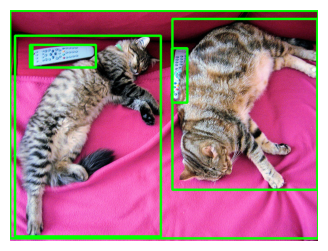

In [7]:
from transformers import pipeline
from transformers import ObjectDetectionPipeline, YolosConfig, YolosForObjectDetection
from transformers import YolosImageProcessor, YolosImageProcessorFast

img_file= "./imgs/000000039769.jpg"

# 使用pipeline创建ObjectDetectionPipeline对象
pipe = pipeline("object-detection", model="F:/03Models/yolos-tiny")

# 预处理
inputs = pipe.preprocess(img_file)
# 模型推理
outputs = pipe.forward(model_inputs=inputs)
# 后处理
results = pipe.postprocess(outputs, threshold=0.5)
print(len(results))


# 可视化结果
def visual(imgfile, objects):
    import matplotlib.pyplot as plt
    import cv2
    img = cv2.imread(imgfile, cv2.IMREAD_COLOR_RGB)
    for a_object in objects:
        score = a_object["score"]
        label = a_object["label"]
        xmin = a_object["box"]["xmin"]
        ymin = a_object["box"]["ymin"]
        xmax = a_object["box"]["xmax"]
        ymax = a_object["box"]["ymax"]
        print(F"{score}, {label}, ({xmin}, {ymin}, {xmax}, {ymax})")
        cv2.rectangle(img, pt1=(xmin, ymin), pt2=(xmax, ymax), color=(0, 255, 0), thickness=3)
    plt.figure(figsize=(4, 3))
    plt.imshow(img)
    plt.axis("off")
visual("./imgs/000000039769.jpg", results)

### (4) 使用YolosForObjectDetection与YolosImageProcessor底层调用模型推理

- 这里我们不通过Pipeline调用模型推理，而是直接使用YolosForObjectDetection与YolosImageProcessor直接完成模型推理。
    - YolosForObjectDetection负责模型推理预测
    - YolosImageProcessor负责与处理与后处理

0.991011381149292, remote, (46, 72, 178, 119)
0.9084843397140503, remote, (336, 79, 368, 192)
0.9336147904396057, cat, (337, 18, 638, 373)
0.9794104099273682, cat, (10, 53, 313, 470)
0.5018215775489807, bed, (0, 1, 640, 474)
0.9740177392959595, remote, (41, 72, 178, 119)


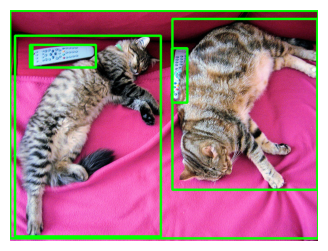

In [15]:
from transformers import YolosForObjectDetection
from transformers import YolosImageProcessor, YolosImageProcessorFast
import torch
import matplotlib.pyplot as plt
import PIL


model = YolosForObjectDetection.from_pretrained("F:/03Models/yolos-tiny")
processor = YolosImageProcessor.from_pretrained("F:/03Models/yolos-tiny")

img_file= "./imgs/000000039769.jpg"

# 1. 预处理preprocess====================================
# 1.1. 加载图像
image = PIL.Image.open(img_file)   # 打开图像
image = PIL.ImageOps.exif_transpose(image)  # 根据图像的EXIF方向信息，自动旋转图像，使其以正确的方向显示。
image = image.convert("RGB")  # 把图像转换为RGB像素格式
# 1.2. 调用processor进行图像处理
inputs = processor(images=[image], return_tensors="pt")  
# YolosImageProcessorFast返回具有两个字段（pixel_mask，pixel_values）的字典pixel_mask是图像补齐的掩码，1表示真实像素，0表示padding像素
# YolosImageProcessor返回具只有一个字段（pixel_values）的字典
# 1.3. 获取图像大小（侦测目标后，结果要复原成原图像大小
target_size = torch.IntTensor([[image.height, image.width]])
# 2. 推理forward=========================================
# 2.1. 调用模型进行推理
with torch.no_grad():
    model_outputs = model(**inputs)  # 把字典展开为关键字参数形式,模型输出为YolosObjectDetectionOutput对象
# model_outputs = outputs.__class__({"target_size": target_size, **model_outputs})  # 在输出的结果中注入一个字段（与字典的注入方式不同）

# 3. 后处理postprocess===================================
## 3.1. 调用processor进行后处理（阈值是过滤概率较低的侦测目标）
post_outputs = processor.post_process_object_detection(model_outputs, threshold=0.5, target_sizes=target_size)
## 3.2. 对后处理的数据进行格式转换。其中boxes需要转换为int。这样容易绘制。
post_output = post_outputs[0] # 一张图像的处理
scores = post_output["scores"].tolist()
labels = post_output["labels"].tolist()
boxes = post_output["boxes"].to(int).tolist()

# 转换格式后替换原来输出
post_output["scores"] = scores
post_output["labels"] = [model.config.id2label[label] for label in labels]
post_output["boxes"] = [{"xmin":xmin, "ymin":ymin, "xmax": xmax, "ymax":ymax} for xmin, ymin, xmax, ymax in boxes]

# 3.3. 把输出还原成官方格式（目标转换为列表，每个元素就是一个侦测的目标，每个目标使用字典表示score，label，box）
keys = ["score", "label", "box"]
results = [dict(zip(keys, vals)) for vals in zip(post_output["scores"], post_output["labels"], post_output["boxes"])]

# 4. 可视化#####################################
def visual(imgfile, objects):
    import matplotlib.pyplot as plt
    import cv2
    img = cv2.imread(imgfile, cv2.IMREAD_COLOR_RGB)
    for a_object in objects:
        score = a_object["score"]
        label = a_object["label"]
        xmin = a_object["box"]["xmin"]
        ymin = a_object["box"]["ymin"]
        xmax = a_object["box"]["xmax"]
        ymax = a_object["box"]["ymax"]
        print(F"{score}, {label}, ({xmin}, {ymin}, {xmax}, {ymax})")
        cv2.rectangle(img, pt1=(xmin, ymin), pt2=(xmax, ymax), color=(0, 255, 0), thickness=3)
    plt.figure(figsize=(4, 3))
    plt.imshow(img)
    plt.axis("off")
visual("./imgs/000000039769.jpg", results)


- 代码说明：
    - 推理输出包含的字段如下：
        - `loss: Optional[torch.FloatTensor]`
            - 只有model调用的参数中指定labels参数（字典数组格式，每个字典包含class_labels与boxes字段），会返回loss损失值。
            - 该参数主要在训练的时候有用。
        - `loss_dict: Optional[dict]`
            - 返回损失值的字典格式，用来输出日志。
        - `logits: Optional[torch.FloatTensor]`
            - 返回logits的格式为(batch_size, num_queries, num_classes + 1)) 
        - `pred_boxes: Optional[torch.FloatTensor]`
            - 返回侦测目标框，输出格式为(batch_size, num_queries, 4)) 
        - `auxiliary_outputs: Optional[list[dict]]`
            - 需要设置如下配置：config.auxiliary_loss = True。并且需要设置labels参数，
            - 输出类型是`list[Dict]`，包含两个字段(logits and pred_boxes) 
        - `last_hidden_state: Optional[torch.FloatTensor]`
            - 输出格式为 (batch_size, sequence_length, hidden_size), 
        - `hidden_states: Optional[tuple[torch.FloatTensor]]`
            - 需要在调用参数中设置output_hidden_states=True。
            - 输出格式为 (batch_size, sequence_length, hidden_size)。
        - `attentions: Optional[tuple[torch.FloatTensor]]`
            - 需要在调用参数中设置output_attentions=True。
            - 输出格式为(batch_size, num_heads, sequence_length, sequence_length).
    - 本代码中，只有logits，pred_boxes，hidden_states三个字段有数据，其他都是None。

#### 提示

- 在上面代码基础上，我们可以进一步使用自己的实现代替processor的`__call__`与processor的`post_process_object_detection`调用。这个在侯建训练主题中来专门讲解。

-----